1.Разработать программу, реализующую интегрирование заданной функции методом средних прямоугольников (или иным методом, на выбор) с адаптивной сеткой.  
2.Сравнить скорость сходимости данного метода и метода с равномерной сеткой.  
Указание: для выбора "наибольшего интервала" воспользуйтесь модулем "heapq" из стандартной библиотеки.

In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

In [44]:
def create_rectangle(a, b, f):
    """Создадим прямоугольник на интервале [a,b]"""
    rectangle = (a, b-a)
    xm = a + rectangle[1] / 2.
    return (f(xm) * rectangle[1], rectangle)

In [ ]:
def max_element(lst):
    """Найдем прямоугольник с максимальной площадью с помощью сортировки heapq. Вернем этот элемент в хвост списка"""
    heapq.heapify(lst)
    
    return lst[-1],lst[:-1]

In [58]:
def adaptive_method_list(f, a, b, npts):
    """Интегрируем данную функцию методом средних прямоугольников с адаптивной сеткой
    """
    lst = []
    # start from a single rectangle
    item = make_rect(a, b, f)
    lst.append(item)
    # loop
    for _ in range(npts):
        # get the largest one
        rect, lst = get_max_elem(lst)
        w, (start, width) = rect
                
        # and split it into two halves
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        
        lst.append(rect1)
        lst.append(rect2)
    # collect the answer
    return sum(w for w, r in lst), lst


In [72]:
def calculate(f, a, b, npts):
    h = (b - a) / npts
    summ = 0
    for _ in range(npts):
        x = a + h*(_ + 0.5)
        summ+= f(x)
    return summ * h

In [73]:
def f(x):
    """Определим функцию,интеграл для которой мы сможем найти"""
    return (np.sin(-x))

In [74]:
"""Определим начало и конец интервала а и b"""
a, b = 5, 100

def exact_value(a, b):
    """Найдем точное значение интеграла"""
    return (-np.sin(-b)+np.sin(-a))

for n in (5, 25, 125, 250, 500, 1000, 5000):
    res, lst = adaptive_method_list(f, a, b, n)
    print ('n, res = ', n, res)
print ('Точное значение:', exact(a,b))

n, res =  5 -37.23286763848179
n, res =  25 -59.5530247810548
n, res =  125 -59.77129076020876
n, res =  250 -59.77415190562149
n, res =  500 -59.77464653570803
n, res =  1000 -59.77476031102863


n, res =  5000 -59.774791895718934
Точное значение: 0.006737946999085467


In [76]:
%timeit adaptive_method_list (f, a, b, npts=1000)

10 loops, best of 3: 102 ms per loop


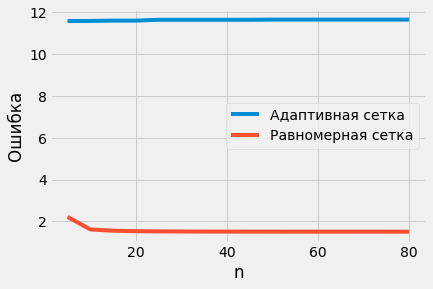

In [83]:
res1 = []
res2 = []
a, b = 0, 20
npts = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
for _ in npts:
    res1.append(abs(adaptive_method_list(f, a, b, _)[0]-exact_value(a,b)))
    res2.append(abs(calculate(f,a,b,_)-exact_value(a,b)))

plt.figure()
plt.plot(npts,res1,label = 'Адаптивная сетка')
plt.plot(npts,res2,label = 'Равномерная сетка')
plt.ylabel('Ошибка')
plt.xlabel('n')
plt.legend()
plt.plot()
plt.show()

Вывод: интегрирование заданной функции с помощью метода средних прямоугольников с адаптивной сеткой сходится быстрее, чем с равномерной сеткой.